## Homework - Machine Learning Preparation



Kelompok 1--Data Center
- Khalid Destiawan (captain)
- Sherlyna Anugerah Putri
- Aditya Muhammad Hafiz Charnita
- Rika Elisabeth
- Mochammad Bagus Prasetya
- Harianto
- Qomaruzzaman
- Ilyas HY


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()


**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.25.2
pandas version :  1.5.3
seaborn version :  0.13.1


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/RAKAMIN PERSONAL/learning/Homework Feature Extraction

/content/drive/My Drive/Colab Notebooks/RAKAMIN PERSONAL/learning/Homework Feature Extraction


In [4]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Describe Data

## Load Data

In [5]:
df = pd.read_csv("Product_Exclusive_Classification.csv")
df.head()

id               brand     category  rating  number_of_reviews  love  \
0   50  SEPHORA COLLECTION  no category     5.0               46.0   0.0   
1  304  SEPHORA COLLECTION  no category     0.0                0.0   0.0   
2  404  SEPHORA COLLECTION  no category     0.0                0.0   0.0   
3  443  SEPHORA COLLECTION  no category     0.0                0.0   0.0   
4  463  SEPHORA COLLECTION  no category     0.0                0.0   0.0   

   price  value_price  exclusive  
0   50.0         50.0          0  
1   50.0         50.0          0  
2   50.0         50.0          0  
3   50.0         50.0          0  
4   50.0         50.0          0

## Describe Data

# 1. Descriptive Statistics




Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil
observasinya, seperti:<br>
<br>
A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?<br><br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?<br><br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)<br><br>
* Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah,
misal untuk A: “Semua tipe data sudah sesuai”

In [6]:
df.sample(5)

id               brand               category  rating  \
6040  2186575  SEPHORA COLLECTION            Eye Brushes     4.5   
3034  1920917        Living Proof                   Hair     3.5   
6587  2213247      Summer Fridays              Mini Size     4.0   
89     445478               Fresh  Face Wash & Cleansers     4.5   
6503  2210342               Murad      Value & Gift Sets     4.5   

      number_of_reviews     love  price  value_price  exclusive  
6040               16.0   3700.0    8.0          8.0          1  
3034               55.0   6000.0   13.0         13.0          0  
6587             2000.0  44100.0   25.0         25.0          1  
89                598.0  11500.0   42.0         42.0          0  
6503                9.0   3600.0   30.0         45.0          0

In [7]:
# A. Tipe Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


In [8]:
#kelompokan sesuai jenis kolom
cate = ['brand', 'category']
numb = ['id','rating','number_of_reviews','love','price','value_price','exclusive']

In [9]:
df[numb].describe()

id       rating  number_of_reviews          love  \
count  8.000000e+03  7905.000000        7991.000000  7.966000e+03   
mean   1.910231e+06     4.085136         303.574396  1.756396e+04   
std    3.858353e+05     0.761069         931.724460  4.425339e+04   
min    5.000000e+01     0.000000           0.000000  0.000000e+00   
25%    1.773379e+06     4.000000          14.000000  2.000000e+03   
50%    2.030360e+06     4.000000          56.000000  5.500000e+03   
75%    2.185074e+06     4.500000         231.500000  1.530000e+04   
max    2.293801e+06     5.000000       19000.000000  1.300000e+06   

             price  value_price    exclusive  
count  7992.000000  7983.000000  8000.000000  
mean     49.900935    50.983300     0.255875  
std      46.864764    48.473049     0.436379  
min       2.000000     2.000000     0.000000  
25%      24.000000    24.000000     0.000000  
50%      35.000000    35.000000     0.000000  
75%      59.000000    60.000000     1.000000  
max     549.000000   549.000000     1.000000

In [10]:
df[cate].describe()

brand category
count                 8000     7987
unique                 310      142
top     SEPHORA COLLECTION  Perfume
freq                   492      619

**Jawaban Soal 1**<br>

A. Semua tipe data sudah sesuai<br>
B. kolom category, rating, number_of_reviews, love, price, value_price memiliki data kosong<br>
C. Kolom Summary:
1. kolom rating terlihat normal<br>
2. Kolom number_of_reviews ada indikasi outlier atau skewed distribution (positively skewed)<br>
3. Kolom love ada indikasi outlier atau skewed distribution (positively skewed)<br>
4. Kolom price ada indikasi outlier atau skewed distribution (positively skewed)<br>
5. Kolom value_price ada indikasi outlier atau skewed distribution (positively skewed)


# Exploratory Data Analysis (EDA)

### 2. Univariate Analysis
Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

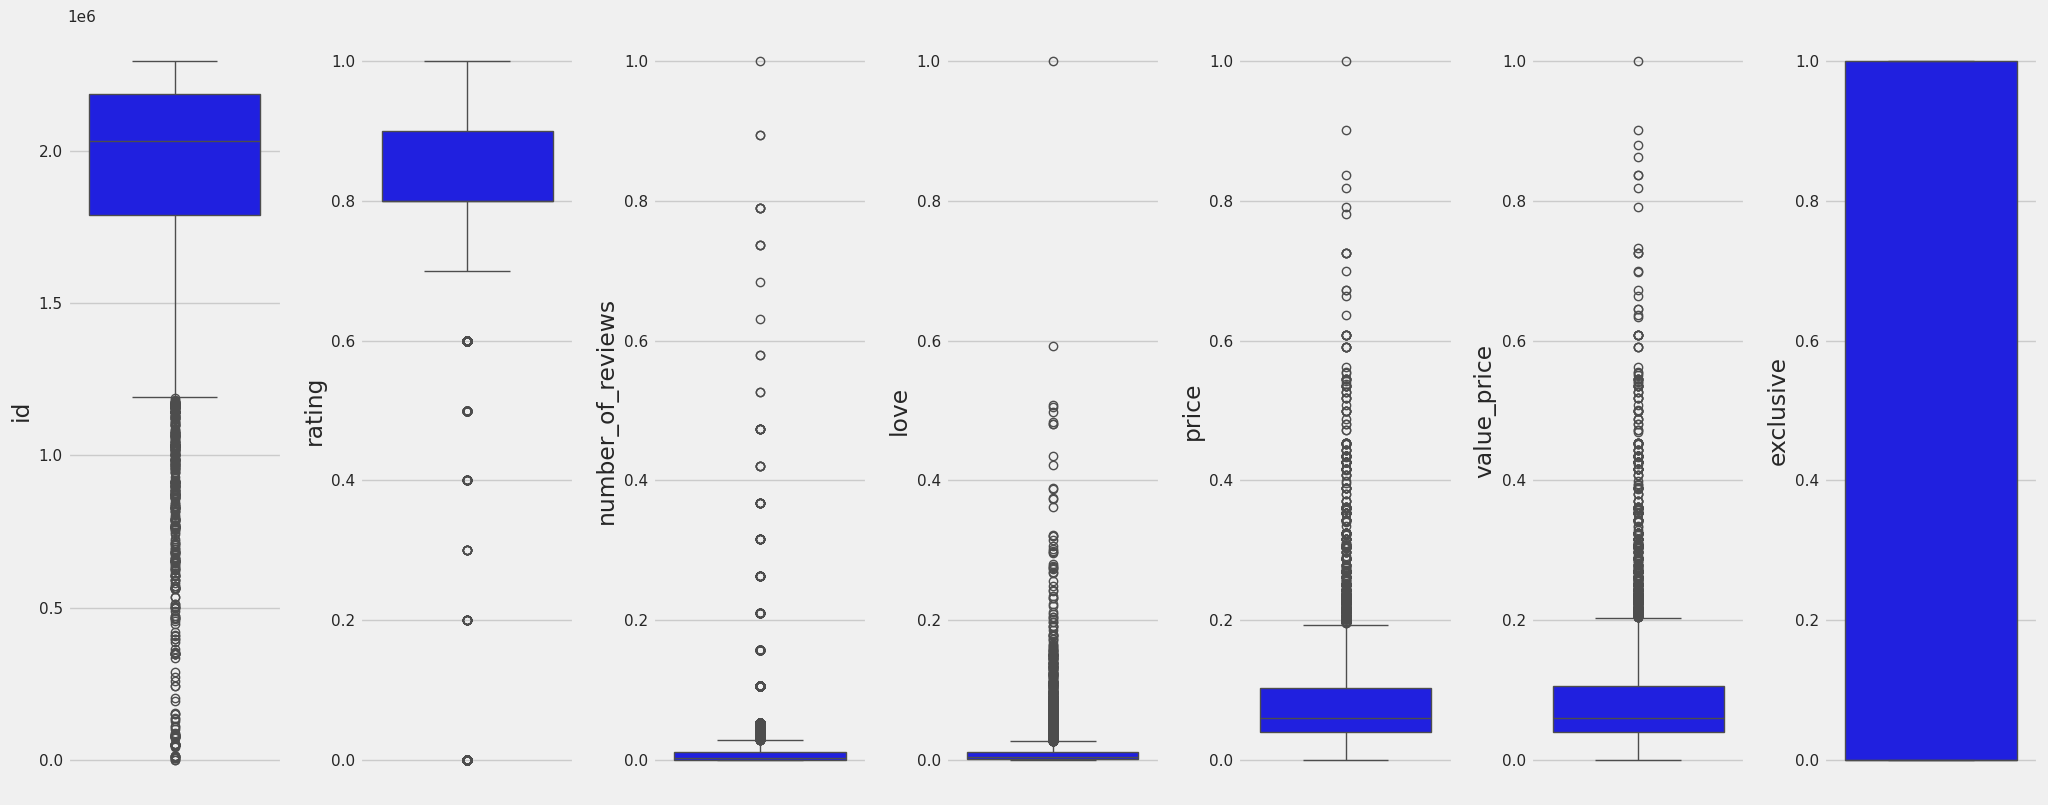

In [82]:
# boxplot untuk feature numerik
for i in range(0, len(numb)):
    plt.subplot(1, len(numb), i+1)
    sns.boxplot(y=df[numb[i]], color='blue', orient='v')
    plt.tight_layout()

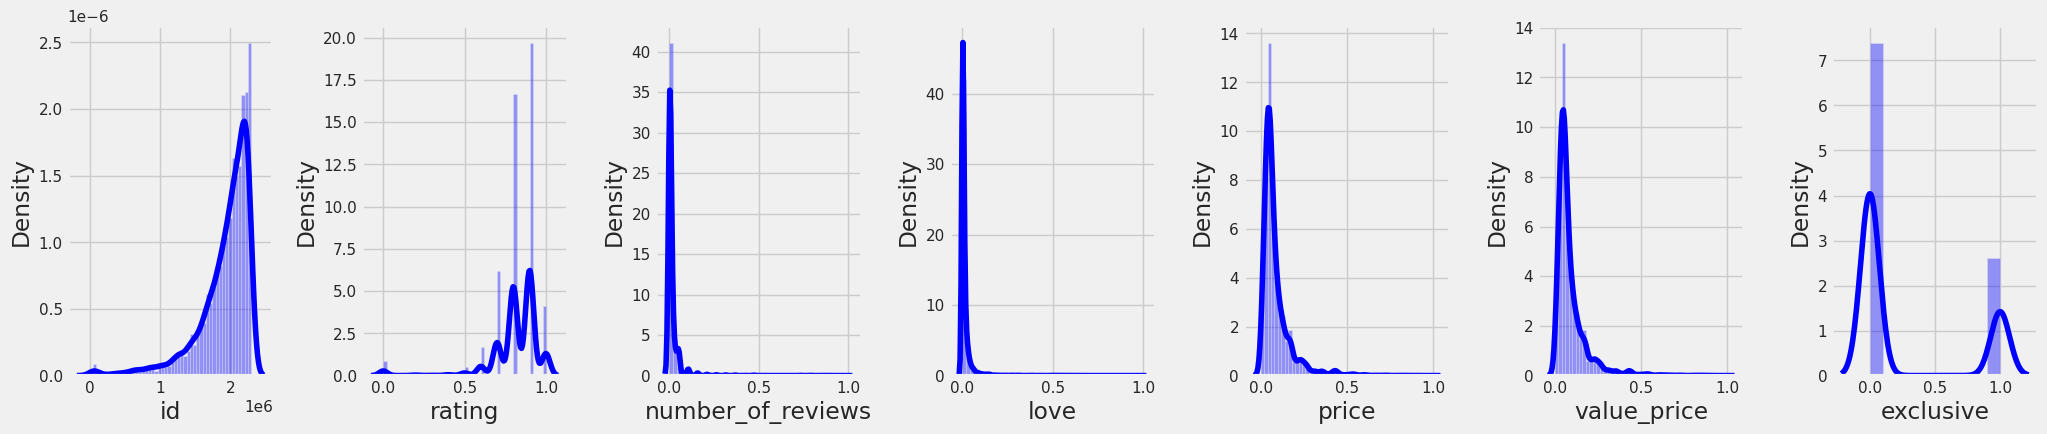

In [83]:
# distribusi untuk feature numerik
for i in range(0, len(numb)):
    plt.subplot(2, len(numb), i+1)
    sns.distplot(df[numb[i]], color='blue')
    plt.tight_layout()

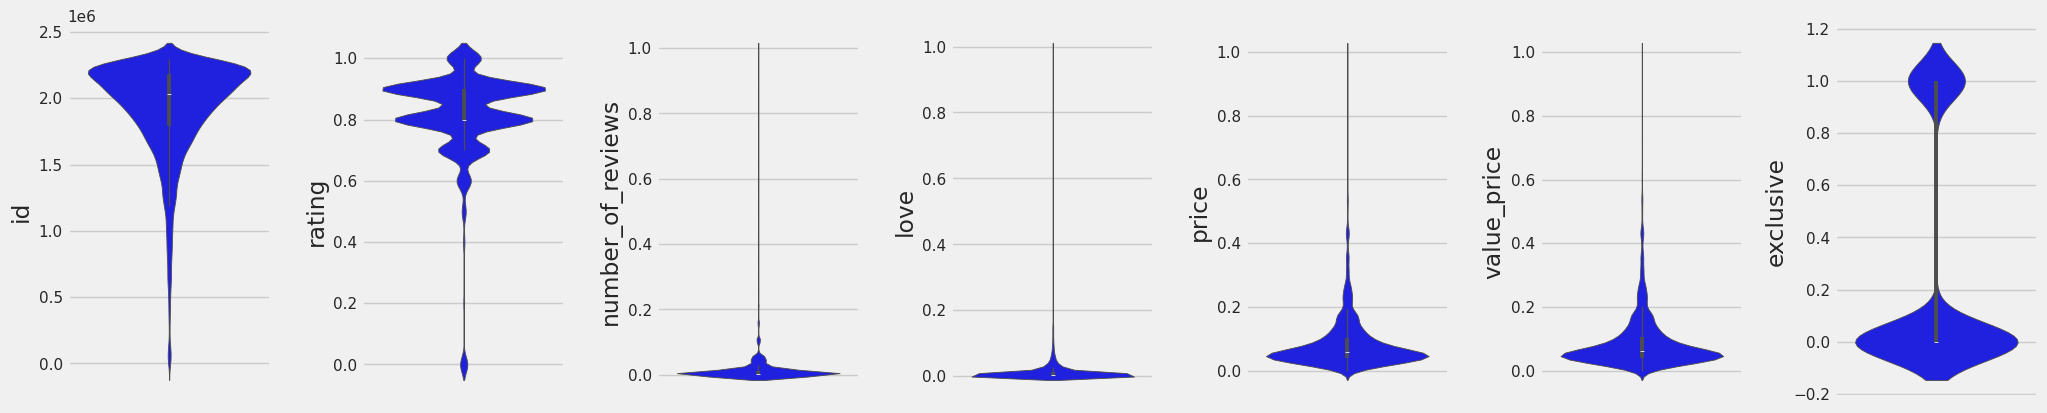

In [84]:
#violin plot feature numerik
for i in range(0, len(numb)):
    plt.subplot(2, len(numb), i+1)
    sns.violinplot(df[numb[i]], color='blue')
    plt.tight_layout()

**Jawaban Soal 2** <br>
***Data Numerik***
1. Rating : data kebanyakan tersebar pada nilai 4.0 s/d 4.5 dan terdapat outlier pada nilai 0 s/d 3 serta diatribusinya bimodal
2. number_of_reviews : distribusi skew ke kanan (positively skewed) dimana terdapat outlier yang sangat besar terutaman diatas nilai 1000.
3. love : distribusi skew ke kanan (positively skewed) dimana terdapat 1 global outlier yang yang berbeda sendiri yang bernilai diatas 1.2
4. price : distribusi skew ke kanan (positively skewed) dan terdapat outlier
5. value_price : dari bentuk distribusi dan boxplot sagat mirip dengan feature price kemungkinan ada nilai redundan dari price
6. exclusive : distribusi skew ke kanan (positively skewed)
<br><br>

***Follow-Up***<br>
1. Untuk data numerik yang memiliki outlier akan dihapus dengan metode IQR
2. Ubah semua data feature numerik agar memiliki skala yang sama dengan normalisasi/Standarisasi/Log Transform


### 3. Multivariate Analysis
Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti:<br>
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?<br>
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?<br>
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

<Axes: >

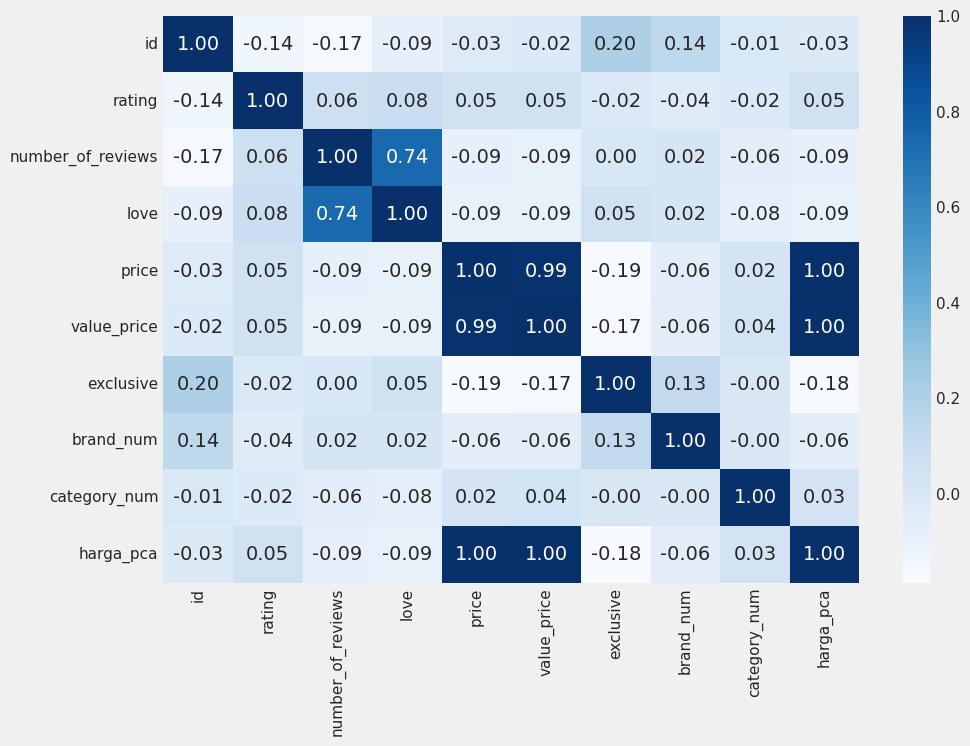

In [88]:
plt.figure(figsize=(10, 7))

sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

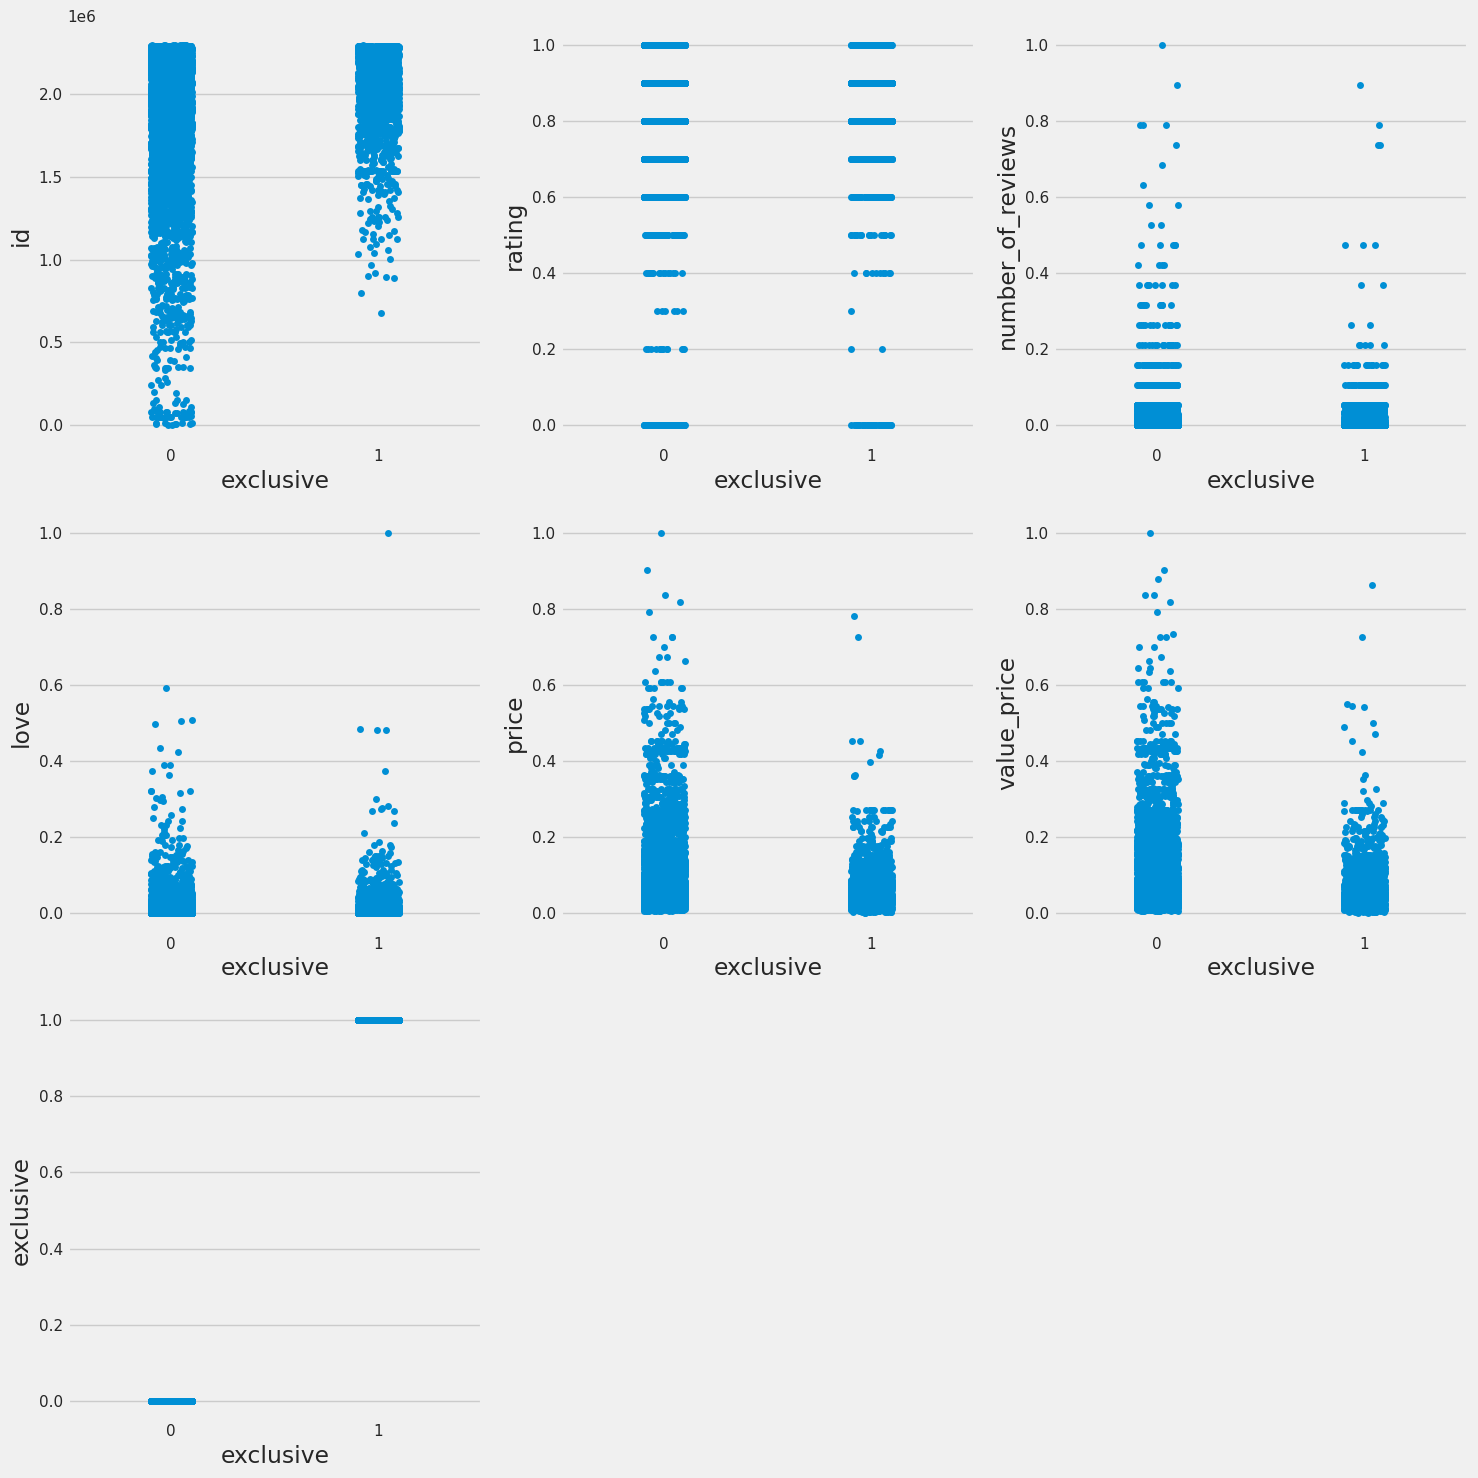

In [86]:
# korelasi feature brand dan feature numerik
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numb)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='exclusive', y=numb[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

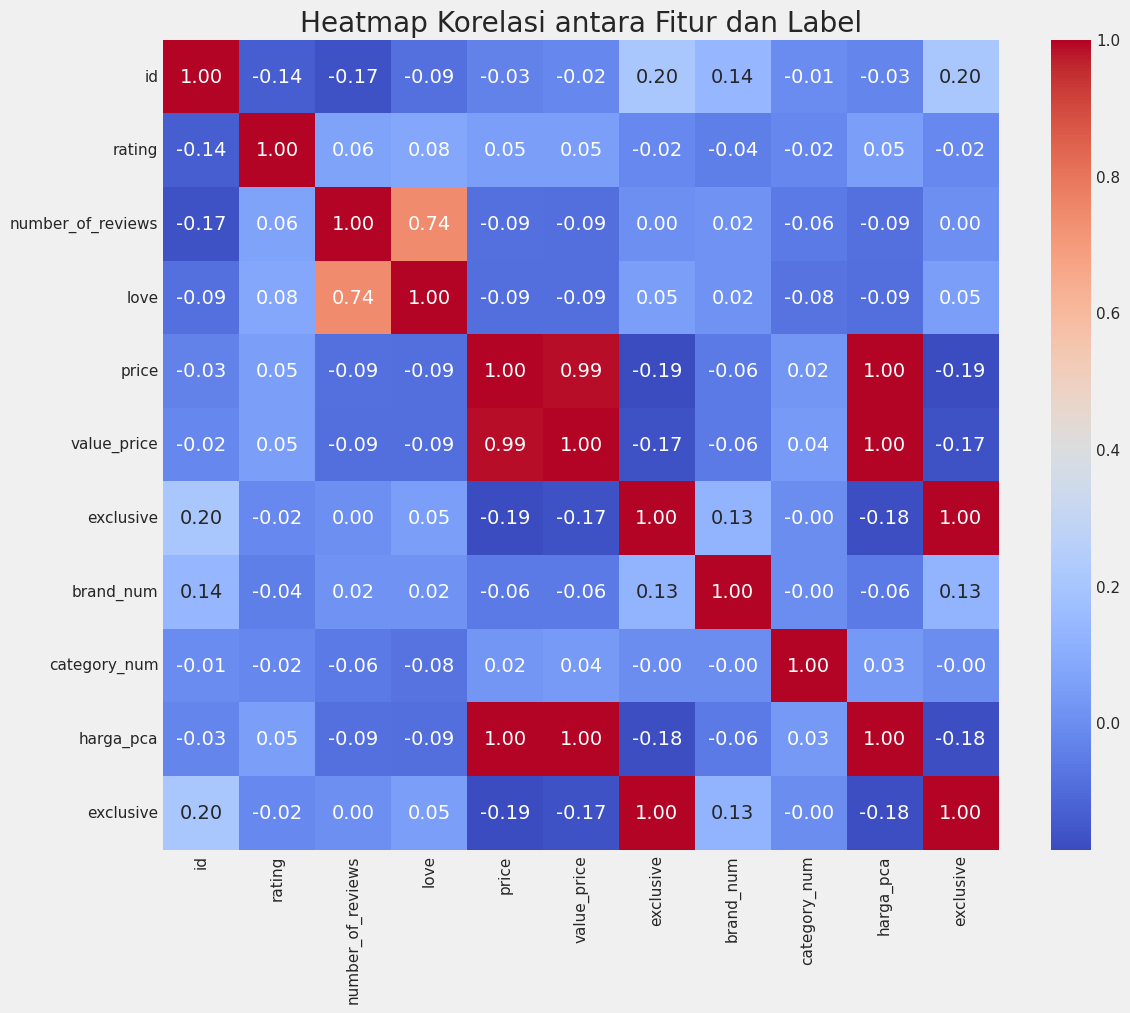

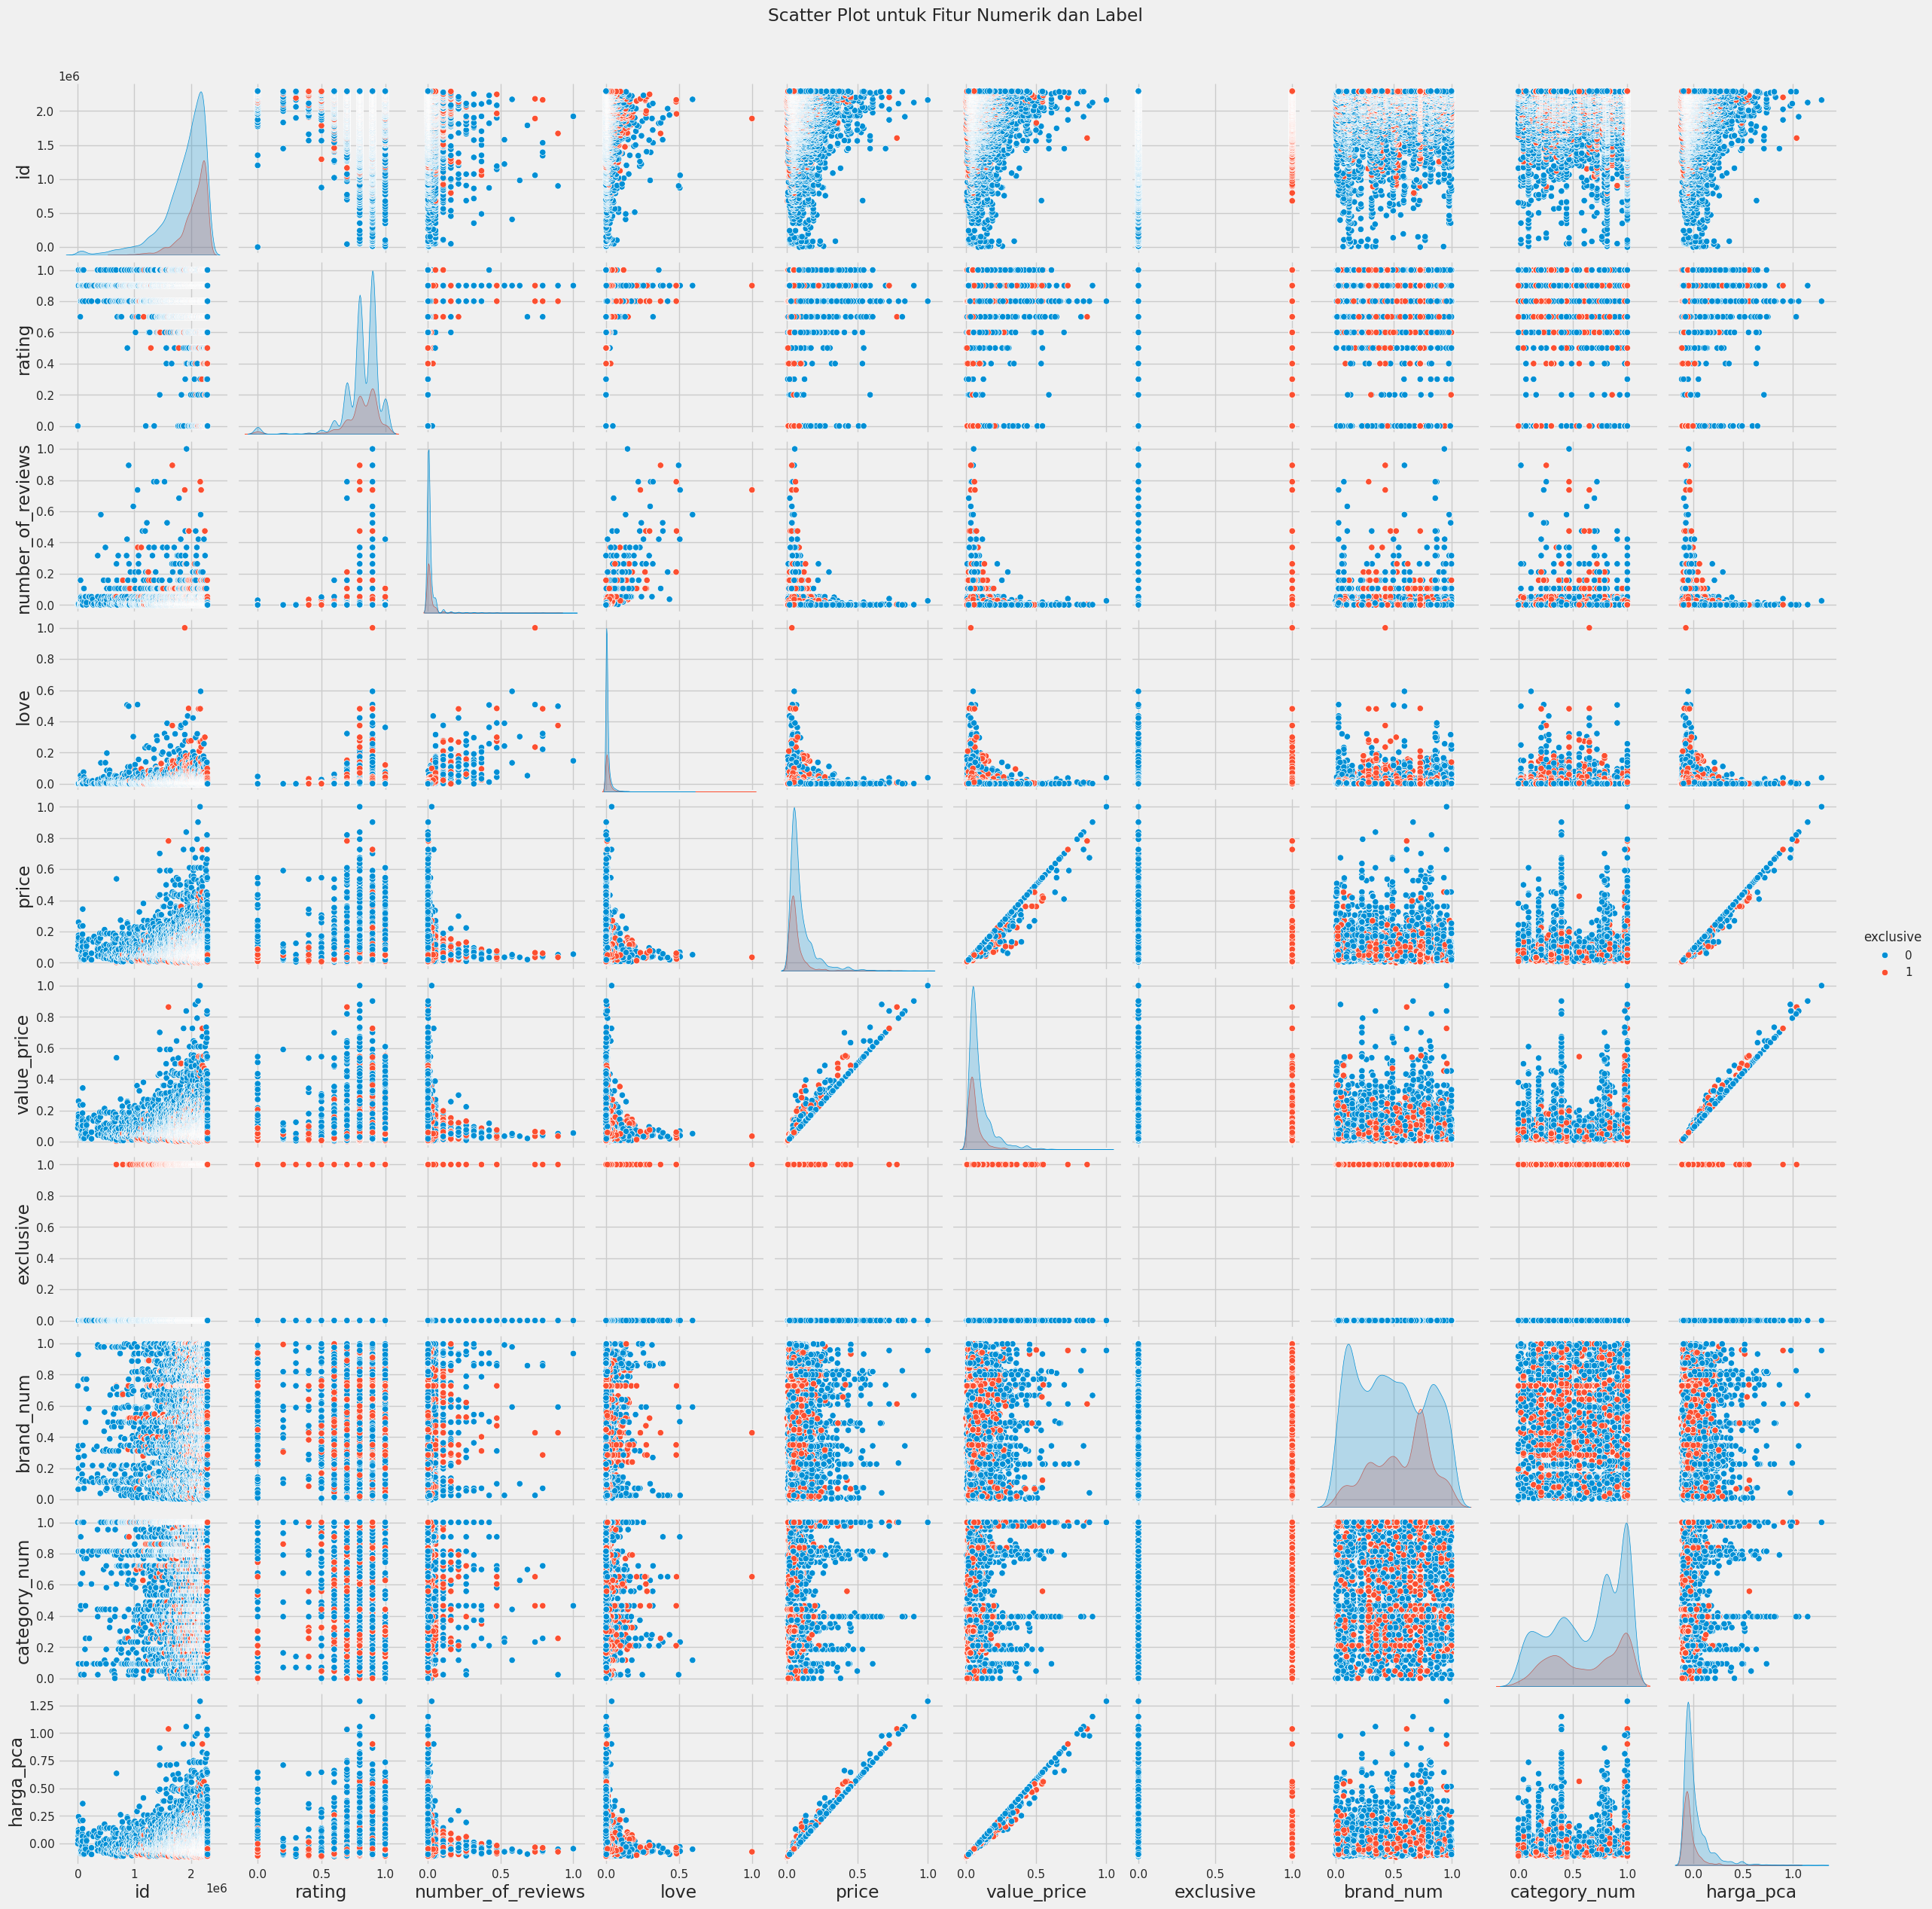

In [113]:
#Mencari Hubungan tiap feature terhadap label
numeric_features = df.select_dtypes(include=['float64', 'int64'])
all_features = pd.concat([numeric_features, df['exclusive']], axis=1)

# Menghitung korelasi antara fitur numerik dan label menggunakan Pearson Correlation Coefficient
correlation_matrix = all_features.corr()
correlation_matrix

# Menampilkan heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antara Fitur dan Label')
plt.show()

# Memvisualisasikan scatter plot untuk fitur-fitur numerik
sns.pairplot(df, vars=numeric_features.columns, hue='exclusive', diag_kind='kde')
plt.suptitle('Scatter Plot untuk Fitur Numerik dan Label', y=1.02)
plt.show()

**Jawaban Soal 3** <br><br>
**A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?**<br>
Korelasi tiap feature pada label (Ekslusive)

1. Price menunjukan korelasi negatif yang kuat, Harga memiliki hubungan negatif yang cukup kuat dengan eksklusivitas, yang berarti semakin tinggi harga produk, semakin rendah kemungkinan produk itu eksklusif.

2. Value Price menunjukan korelasi negatif yang kuat, Nilai harga juga menunjukkan hubungan negatif yang kuat dengan eksklusivitas, mirip dengan harga.

3. rand Number menunjukan korelasi positif yang sedang Fitur ini menunjukkan hubungan positif yang sedang dengan label "exclusive". Mungkin merek yang lebih terkenal cenderung memiliki produk eksklusif.
<br><br>
**B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?k**<br>
Price dan Value_price memiliki korelasi yang sangat tinggi (0.987777), yang
menunjukkan bahwa keduanya hampir identik atau sangat mirip dalam hal korelasi dengan fitur lainnya. mungkin perlu untuk mempertimbangkan untuk menggunakan hanya salah
satu dari kedua fitur ini dalam analisis lebih lanjut.<br><br>
Love memiliki korelasi yang cukup tinggi dengan Number_of_reviews (0.744099),
menunjukkan bahwa produk dengan tingkat kepuasan yang tinggi cenderung memiliki lebih
banyak ulasan. Pola ini bisa dijelaskan dengan asumsi bahwa produk yang disukai
cenderung menarik lebih banyak perhatian dan ulasan dari konsumen.

# 4. Data Cleansing

## A. Missing Value

In [114]:
def info_missing_value(data):
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (df.isnull().sum() / len(data) * 100).sort_values(ascending=False)
  missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  missing_data = missing_data[missing_data['Total'] > 0]
  return missing_data

data = info_missing_value(df)
data

Empty DataFrame
Columns: [Total, Percent]
Index: []

In [115]:
#Missing Value tidak tampil = sudah terhapus
df = df.dropna(subset=['rating', 'love', 'value_price', 'category', 'number_of_reviews', 'price'])
data = info_missing_value(df)
data

Empty DataFrame
Columns: [Total, Percent]
Index: []

Ditemukan missing value pada feature 'rating', 'love', 'value_price', 'category',
'number_of_reviews', 'price' namun jumlah nya tidak signifikan dengan persentase di bawah
10% dari total record sehingga kami menggunakan teknik penghapusan

## B. Duplicate Values


In [116]:
# Declare Function
def check_duplicate(data):
  if data.duplicated(subset=data.columns.difference(['id'])).sum() > 0:
      print("Ditemukan data duplicate sebesar:", data.duplicated(subset=data.columns.difference(['id'])).sum())
  else:
      print("Tidak ditemukan data duplicate")

# Run Function
check_duplicate(df)

Tidak ditemukan data duplicate


In [117]:
#Remove Duplicate
df.drop_duplicates(subset=df.columns.difference(['id']), inplace=True)
#Check Ulang
check_duplicate(df)

Tidak ditemukan data duplicate


Ditemukan data duplicate sebanyak 6 baris, lalu hapus data duplicate tersebut.

## C. Handle Outliers

Untuk menghapus data outlier menggunakan metode IQR



In [118]:
# Metode IQR
# Define Function " Dettect Outlier"
def detect_outliers(dataset, threshold=1.5):
  outlier_info = {}
  feature_list = []
  upper_bound_list = []
  lower_bound_list = []

  for column in dataset.columns:
    values = dataset[column]
    Q1 = np.percentile(values, 25)
    Q3 = np.percentile(values, 75)

    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = values[(values < lower_bound) | (values > upper_bound)]
    feature_list.append(column)
    upper_bound_list.append(upper_bound)
    lower_bound_list.append(lower_bound)

    outlier_info[column] = {
      'Lower Bound': lower_bound,
      'Upper Bound': upper_bound,
      # 'Outliers': outliers.tolist()
}
  return {'standart' : outlier_info, 'dataframe' : pd.DataFrame({'feature' : feature_list})}

def remove_outliers(dataset, outlier_info):
  cleaned_dataset = dataset.copy()
  for feature, info in outlier_info.items():
      lower_bound = info['Lower Bound']
      upper_bound = info['Upper Bound']

      cleaned_dataset = cleaned_dataset[(cleaned_dataset[feature] >= lower_bound)]
  return cleaned_dataset

In [119]:
outlier_info = detect_outliers(df[numb])
outlier_info['standart']

{'id': {'Lower Bound': 1188928.125, 'Upper Bound': 2785289.125},
 'rating': {'Lower Bound': 0.6500000000000001, 'Upper Bound': 1.05},
 'number_of_reviews': {'Lower Bound': -0.01623684210526316,
  'Upper Bound': 0.029026315789473685},
 'love': {'Lower Bound': -0.013807692307692307,
  'Upper Bound': 0.027115384615384618},
 'price': {'Lower Bound': -0.05301645338208411,
  'Upper Bound': 0.19561243144424134},
 'value_price': {'Lower Bound': -0.05850091407678246,
  'Upper Bound': 0.2047531992687386},
 'exclusive': {'Lower Bound': -1.5, 'Upper Bound': 2.5}}

In [120]:
# Analis Distribusi Data dengan KDE Plot
def print_kde(selected_dataset, features):
  for i in range(0, len(features)):
    plt.subplot(2, 4, i+1) # 2x4=8> len(numericals)=7
    sns.kdeplot(x=selected_dataset[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

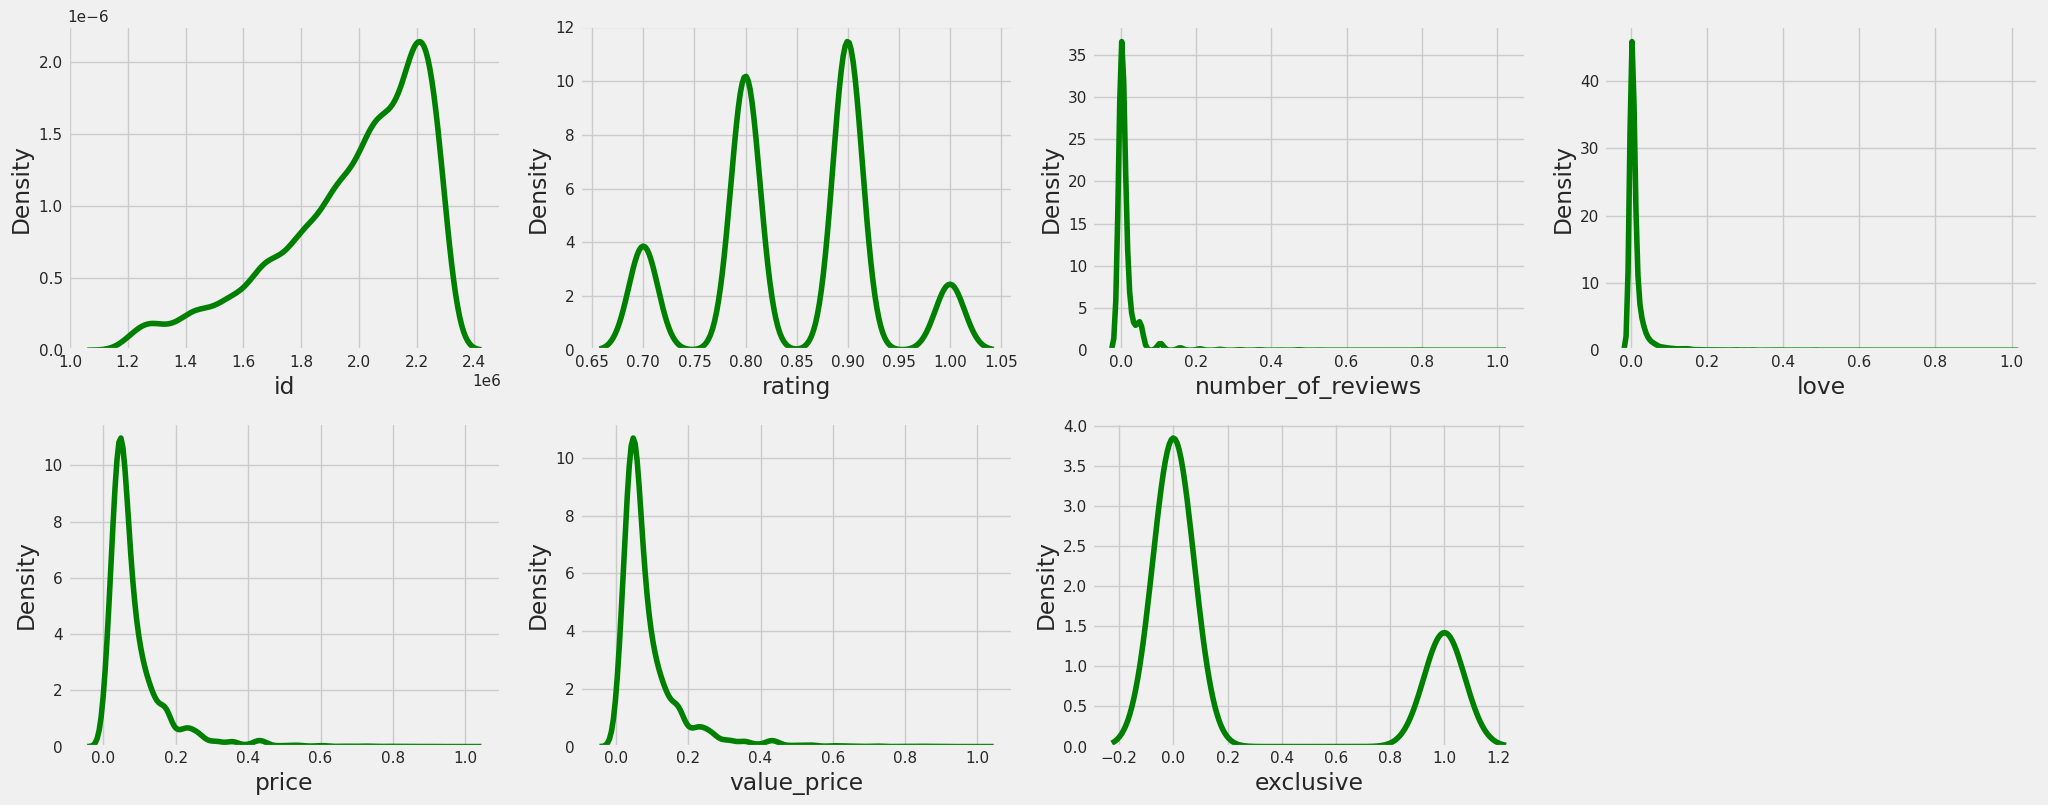

In [121]:
dataset_iqr = remove_outliers(df, outlier_info['standart'])
print_kde(dataset_iqr,numb)

In [122]:
print("Total dataset setelah dihapus dengan metode IQR", len(dataset_iqr))

Total dataset setelah dihapus dengan metode IQR 6896


## D. Feature transformation


In [123]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder

label_encoder                     = LabelEncoder()
df['brand_num']                   = label_encoder.fit_transform(df['brand'])
df['category_num']                = label_encoder.fit_transform(df['category'])
features_to_scale                 = ['rating', 'love', 'price', 'value_price', 'number_of_reviews','brand_num', 'category_num']
scaler                            = MinMaxScaler()
df[features_to_scale]             = scaler.fit_transform(df[features_to_scale])
df

id                    brand  category  rating  number_of_reviews  \
0          50       SEPHORA COLLECTION     other     1.0           0.002421   
1         304       SEPHORA COLLECTION     other     0.0           0.000000   
5        6528                 Givenchy   Perfume     0.9           0.004947   
6        7393                  BVLGARI   Cologne     1.0           0.001632   
7        7740       Yves Saint Laurent   Perfume     0.9           0.008632   
...       ...                      ...       ...     ...                ...   
7995  2293207                  VOLUSPA     other     0.0           0.000000   
7996  2293439                 TOM FORD  Lipstick     0.8           0.001579   
7997  2293488  FENTY BEAUTY by Rihanna     other     0.9           0.001158   
7998  2293793                    tarte   Mascara     0.9           0.000263   
7999  2293801            John Varvatos   Perfume     0.0           0.000000   

          love     price  value_price  exclusive  brand_num  category_num  \
0     0.000000  0.087751     0.087751          0   0.728155      1.000000   
1     0.000000  0.087751     0.087751          0   0.728155      1.000000   
5     0.002308  0.138940     0.138940          0   0.320388      0.813953   
6     0.002538  0.168190     0.168190          0   0.064725      0.093023   
7     0.003231  0.109689     0.109689          0   0.928803      0.813953   
...        ...       ...          ...        ...        ...           ...   
7995  0.000149  0.151737     0.151737          0   0.873786      1.000000   
7996  0.009538  0.096892     0.096892          0   0.818770      0.651163   
7997  0.009923  0.049360     0.058501          1   0.284790      1.000000   
7998  0.001846  0.018282     0.018282          0   0.996764      0.720930   
7999  0.000046  0.168190     0.168190          0   0.398058      0.813953   

      harga_pca  
0     -0.000980  
1     -0.000980  
5      0.071401  
6      0.112761  
7      0.030040  
...         ...  
7995   0.089496  
7996   0.011945  
7997  -0.048690  
7998  -0.099210  
7999   0.112761  

[7822 rows x 12 columns]

1. Ubah data numerik (rating, love, price, value_price, number_of_reviews,brand_num, category_num) agar skalanya sama.
2. Ubah brand dan category menjadi numerik dengan cara label encoder lalu di encoding biar bisa masuk ke feature importance dan model machine learning.


## E. Feature encoding

In [124]:

# Menghitung jumlah kemunculan setiap kategori
counts = df['category'].value_counts()

# Daftar kategori
kategori_other = counts[counts < 51].index

# Mengganti kategori-kategori tersebut dengan label 'other'
df['category'] = df['category'].apply(lambda x: 'other' if x in kategori_other else x)

df['category'].value_counts()

other                        1819
Perfume                       592
Moisturizers                  391
Face Serums                   334
Value & Gift Sets             240
Face Wash & Cleansers         218
Face Masks                    211
Rollerballs & Travel Size     209
Hair Styling Products         205
Face Brushes                  175
Eye Palettes                  170
Eye Creams & Treatments       167
Shampoo                       162
Lipstick                      161
Highlighter                   152
Foundation                    151
Cologne                       137
Mascara                       133
Conditioner                   129
Candles & Home Scents         122
Face Primer                   120
Eyeliner                      105
Makeup                        103
Setting Spray & Powder        101
Mini Size                      95
Eye Brushes                    93
Beauty Supplements             92
Body Lotions & Body Oils       91
Eyebrow                        89
Lotions & Oils

In [125]:
onehot_category = pd.get_dummies(df['category'],  prefix='category')

In [126]:
# join category yang sudah di encoding
df_encoding = df.join(onehot_category,how='outer', lsuffix='right')

In [127]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7822 entries, 0 to 7999
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  7822 non-null   int64  
 1   brand                               7822 non-null   object 
 2   category                            7822 non-null   object 
 3   rating                              7822 non-null   float64
 4   number_of_reviews                   7822 non-null   float64
 5   love                                7822 non-null   float64
 6   price                               7822 non-null   float64
 7   value_price                         7822 non-null   float64
 8   exclusive                           7822 non-null   int64  
 9   brand_num                           7822 non-null   float64
 10  category_num                        7822 non-null   float64
 11  harga_pca                           7822 no

Karena category memiliki data unique yang banyak maka category yang jumlahnya kurang dari 50 akan di gabung menjadi kategori baru yaitu Other lalu dilakukan One-Hot Encoding pada category <br>


## F. Class imbalance

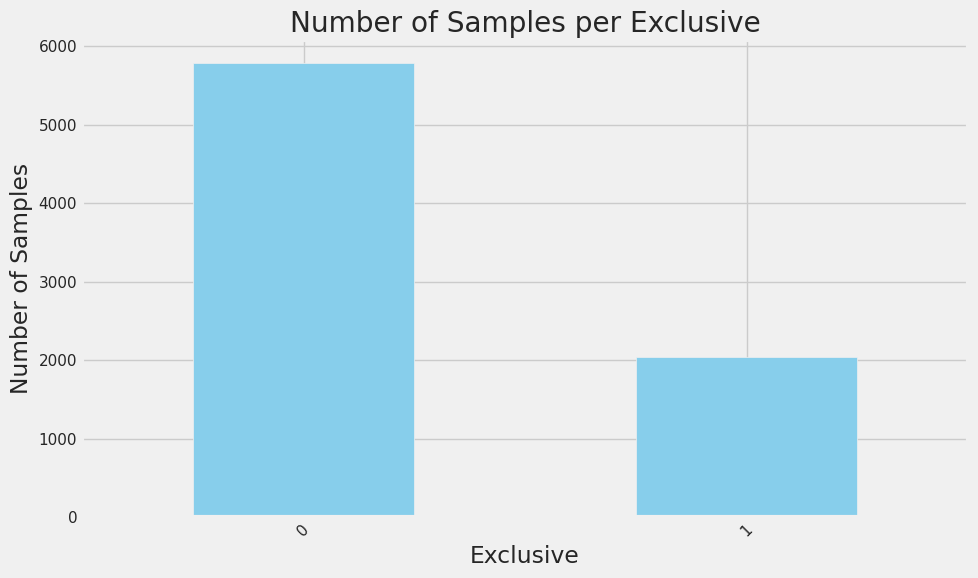

In [128]:
# Profile Imbalance pada Label
class_counts = df['exclusive'].value_counts()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Exclusive')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Exclusive')
plt.xticks(rotation=45)  # Rotasi label kategori agar lebih mudah dibaca
plt.tight_layout()
plt.show()

Dari grafik terlihat gap yang cukup jauh dari produk exclusive dan non-exclusive

**Metode SMOTE**

In [129]:
def print_imbalanced_plot(X_resampled, y_resampled, method):
  # Hitung jumlah data pada setiap kelas sebelum dan setelah resampling
  class_counts_before = [len(y_train[y_train == i]) for i in np.unique(y_train)]
  class_counts_after = [len(y_resampled[y_resampled == i]) for i in np.unique(y_resampled)]

  # Labels untuk kelas
  class_labels = np.unique(y_train)

  # Membuat plot
  plt.figure(figsize=(10, 5))
  plt.bar(class_labels - 0.2, class_counts_before, width=0.4, align='center', label='Sebelum Resampling')
  plt.bar(class_labels + 0.2, class_counts_after, width=0.4, align='center', label='Setelah Resampling')
  plt.xlabel('Kelas')
  plt.ylabel('Jumlah Data')
  plt.title('Resampling dengan '+method,)
  plt.legend()
  plt.show()

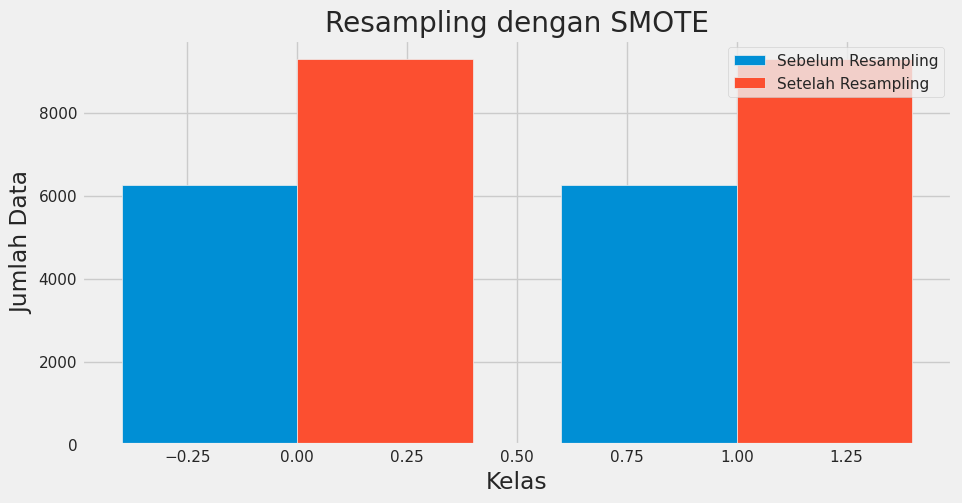

In [130]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import RandomUnderSampler,EditedNearestNeighbours, TomekLinks
from sklearn.model_selection import train_test_split

X = df[['rating','number_of_reviews','love','price','value_price','brand_num', 'category_num']]
y = df[['exclusive']]

# Lakukan train-test split dan jangan pernah melakukan smote pada data testing karena dapat membuat model BIAS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print_imbalanced_plot(X_resampled, y_resampled, 'SMOTE')


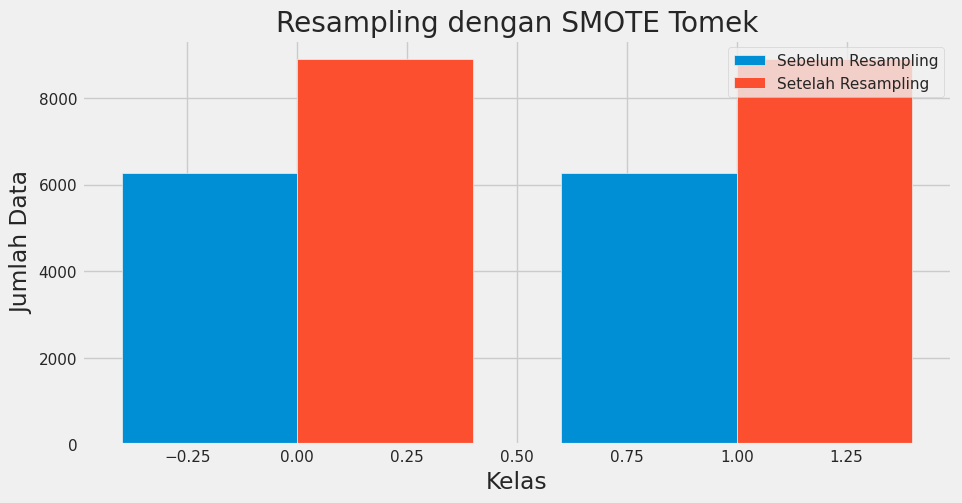

In [131]:
#SMOTE TOMEK
smote = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print_imbalanced_plot(X_resampled, y_resampled, 'SMOTE Tomek')

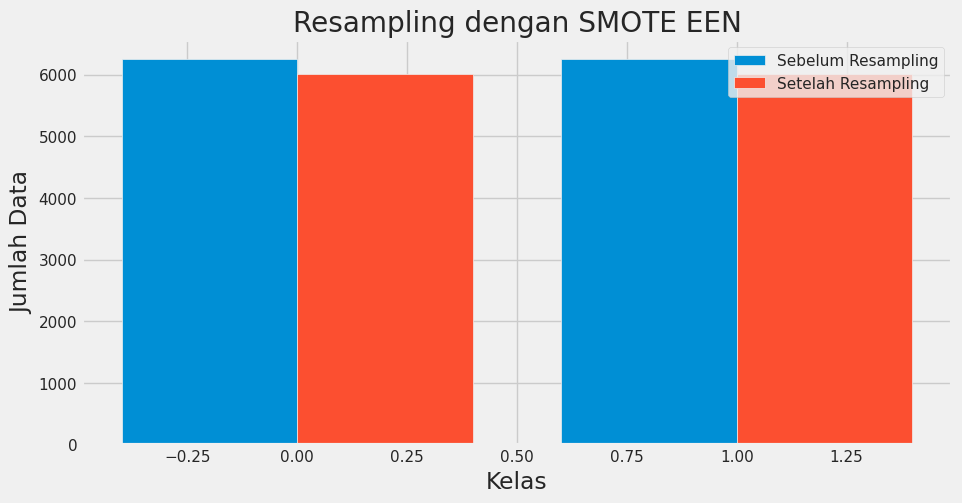

In [132]:
#SMOTE EEN
smote = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print_imbalanced_plot(X_resampled, y_resampled, 'SMOTE EEN')

Berdasarkan dari tiga pengujian resampling yang telah dilakukan menggukan *SMOTE, SMOTE Tomek links (TOMEK) dan SMOTE Edited Nearest Neighbors (EEN)* dapat disimpulakan bahwa hasil yang paling baik adalah SMOTE EEN  


# 5. Feature Engineering

## A.Feature selection

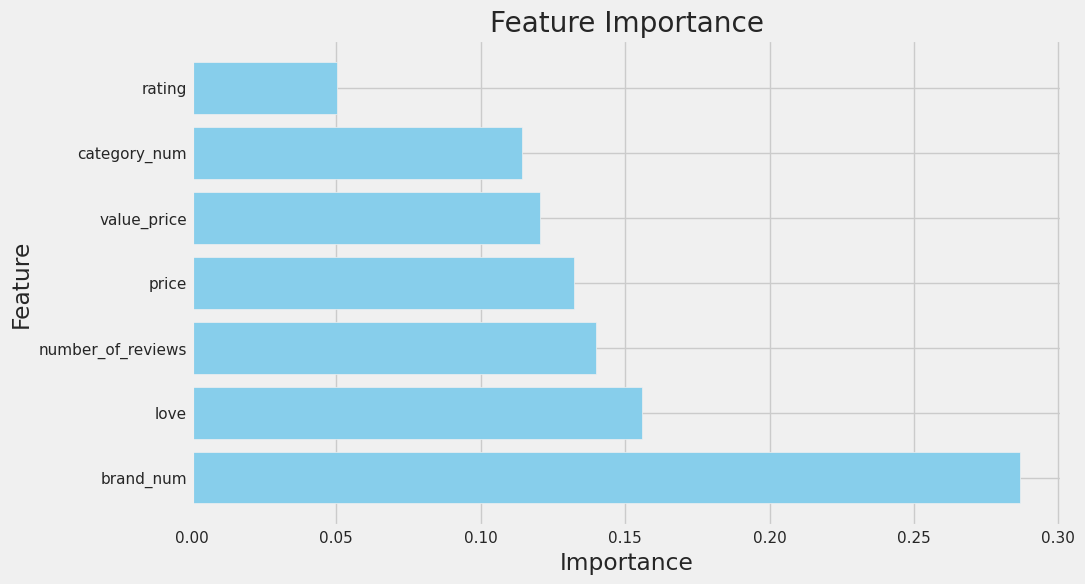

In [133]:
from sklearn.ensemble import RandomForestClassifier

# Buat model Random Forest
rf_model = RandomForestClassifier()
# Latih model pada data latih
rf_model.fit(X, y)
# Dapatkan feature importance
feature_importance = rf_model.feature_importances_
# Simpan hasil feature importance ke dalam DataFrame untuk visualisasi
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
# Urutkan berdasarkan nilai importance secara menurun
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Visualisasikan feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

## B. Feature extraction

In [134]:
df

id                    brand  category  rating  number_of_reviews  \
0          50       SEPHORA COLLECTION     other     1.0           0.002421   
1         304       SEPHORA COLLECTION     other     0.0           0.000000   
5        6528                 Givenchy   Perfume     0.9           0.004947   
6        7393                  BVLGARI   Cologne     1.0           0.001632   
7        7740       Yves Saint Laurent   Perfume     0.9           0.008632   
...       ...                      ...       ...     ...                ...   
7995  2293207                  VOLUSPA     other     0.0           0.000000   
7996  2293439                 TOM FORD  Lipstick     0.8           0.001579   
7997  2293488  FENTY BEAUTY by Rihanna     other     0.9           0.001158   
7998  2293793                    tarte   Mascara     0.9           0.000263   
7999  2293801            John Varvatos   Perfume     0.0           0.000000   

          love     price  value_price  exclusive  brand_num  category_num  \
0     0.000000  0.087751     0.087751          0   0.728155      1.000000   
1     0.000000  0.087751     0.087751          0   0.728155      1.000000   
5     0.002308  0.138940     0.138940          0   0.320388      0.813953   
6     0.002538  0.168190     0.168190          0   0.064725      0.093023   
7     0.003231  0.109689     0.109689          0   0.928803      0.813953   
...        ...       ...          ...        ...        ...           ...   
7995  0.000149  0.151737     0.151737          0   0.873786      1.000000   
7996  0.009538  0.096892     0.096892          0   0.818770      0.651163   
7997  0.009923  0.049360     0.058501          1   0.284790      1.000000   
7998  0.001846  0.018282     0.018282          0   0.996764      0.720930   
7999  0.000046  0.168190     0.168190          0   0.398058      0.813953   

      harga_pca  
0     -0.000980  
1     -0.000980  
5      0.071401  
6      0.112761  
7      0.030040  
...         ...  
7995   0.089496  
7996   0.011945  
7997  -0.048690  
7998  -0.099210  
7999   0.112761  

[7822 rows x 12 columns]

In [135]:
#Dengan menggunakan Dimensional Reduction (PCA) akan menciptakan feature baru yaitu "Harga"
from sklearn.decomposition import PCA
dataset_labeled_pca = df
X = df[['price', 'value_price']]
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
dataset_labeled_pca['harga_pca'] = X_pca

dataset_labeled_pca = dataset_labeled_pca[['rating','number_of_reviews','love','exclusive','harga_pca','price', 'value_price', 'brand_num','category_num']]
dataset_labeled_pca

rating  number_of_reviews      love  exclusive  harga_pca     price  \
0        1.0           0.002421  0.000000          0  -0.000980  0.087751   
1        0.0           0.000000  0.000000          0  -0.000980  0.087751   
5        0.9           0.004947  0.002308          0   0.071401  0.138940   
6        1.0           0.001632  0.002538          0   0.112761  0.168190   
7        0.9           0.008632  0.003231          0   0.030040  0.109689   
...      ...                ...       ...        ...        ...       ...   
7995     0.0           0.000000  0.000149          0   0.089496  0.151737   
7996     0.8           0.001579  0.009538          0   0.011945  0.096892   
7997     0.9           0.001158  0.009923          1  -0.048690  0.049360   
7998     0.9           0.000263  0.001846          0  -0.099210  0.018282   
7999     0.0           0.000000  0.000046          0   0.112761  0.168190   

      value_price  brand_num  category_num  
0        0.087751   0.728155      1.000000  
1        0.087751   0.728155      1.000000  
5        0.138940   0.320388      0.813953  
6        0.168190   0.064725      0.093023  
7        0.109689   0.928803      0.813953  
...           ...        ...           ...  
7995     0.151737   0.873786      1.000000  
7996     0.096892   0.818770      0.651163  
7997     0.058501   0.284790      1.000000  
7998     0.018282   0.996764      0.720930  
7999     0.168190   0.398058      0.813953  

[7822 rows x 9 columns]

Karena price dan value_price memiliki korelasi yang sangat kuat dan diduga banyak data yang redundan maka kedua feature tersebut digabung menjadi satu dengan menggunakan metode Dimensional Reduction (PCA) yang akan membuat feature baru yaitu harga_pca. Kemudian, hasil PCA dimasukkan kembali ke dalam DataFrame
sebagai fitur baru

## C. Tuliskan minimal 4 feature tambahan
Mungkin ini 4 fiture yang dapat membantu performansi model semakin bagus
1. Quantity produk terjual
2. Jumlah komplain per hari
3. Jumlah profit per bulan
4. Waktu pembelian (weekend atau tuidak)


#PENGUJIAN DENGAN MACHINE LEARNING MODEL

Dari hasil data procesing dilakukan pengujian dengan 3 algoritma yaitu:
1. Random Forest
2. Support Vector Machine
3. Decision Tree

Dengan feature yang digunakan diantaranya : rating, number_of_reviews , love ,'value_price, brand<br>
label/Target-nya adalah exclusive

In [136]:
feature =  dataset_labeled_pca[['rating','number_of_reviews','love','value_price','brand_num']]
label   = dataset_labeled_pca[['exclusive']]

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.3,random_state=0)

meth = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = meth.fit_resample(X_train, y_train)


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

#RF
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_predictions = rf_model.predict(X_test)


# SVM
svm_model = SVC(random_state=0)
svm_model.fit(X_train_resampled, y_train_resampled)
svm_predictions = svm_model.predict(X_test)

# DT
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train_resampled, y_train_resampled)
dt_predictions = dt_model.predict(X_test)

# Output classification report untuk RF
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_predictions))

# Output classification report untuk SVM
print("Classification Report for SVM:")
print(classification_report(y_test, svm_predictions))

# Output classification report untuk DF
print("Classification Report for DT:")
print(classification_report(y_test, dt_predictions))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1763
           1       0.62      0.70      0.66       584

    accuracy                           0.82      2347
   macro avg       0.76      0.78      0.77      2347
weighted avg       0.83      0.82      0.82      2347

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.88      0.52      0.65      1763
           1       0.35      0.78      0.48       584

    accuracy                           0.58      2347
   macro avg       0.61      0.65      0.57      2347
weighted avg       0.75      0.58      0.61      2347

Classification Report for DT:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1763
           1       0.61      0.73      0.67       584

    accuracy                           0.82      2347
   macro avg       0.76   

Dari hasil pengujian dari ketiga algoritma tersebut dihasilkan akurasi sebagai berikut:
1. Random Forest memiliki akurasi 82%
2. Support Vector Machine memiliki akurasi 58%
3. Decision Tree memiliki akurasi 87%

Dari ketiganya Decision Tree memiliki akurasi yang paling tinggi


In [137]:
# #@title Convert ipynb to HTML in Colab
# # Upload ipynb
# from google.colab import files
# f = files.upload()

# # Convert ipynb to html
# import subprocess
# file0 = list(f.keys())[0]
# _ = subprocess.run(["pip", "install", "nbconvert"])
# _ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# # download the html
# files.download(file0[:-5]+"html")

# Conclusion

Dari dataset product exclusive clasification dapat disimpulkan <br>
1. Dataset ini cukup baik karena memiliki sedikit missing value dan sedikit record duplicate.
2. Dataset ini memiliki distribusi yang tidak normal karena ditemukan banyak data outlier
3. Dengan melakukan melakukan teknik preprocessing, feature engineering dan handling imabalance data dapat diuji dengan model machine learning.
4. Pengujian dengan Machine Learning Model menunjukan performa model yang baik ditunjukan dengan nilai akurasi yang cukup tinggi bergitu juga dengan precision, recall dan f1-score.
5. Model machine yang dibuat adalah bagaimana membedakan sebuah produk ekslusif atau tidak berdasarkan harga, brand, number of review, dan popularitas